# LISTA 2 DE MÉTODOS NUMÉRICOS I

Interpolação Polinomial

## Importando os pacotes que serão utilizados

In [1]:
from methods.polynomial_interpolation import *
from utils.parser import evaluate_one_variable
from matplotlib import pyplot as plt
from numpy.typing import NDArray
import numpy as np
import sympy as sy

## Resolução das questões

### Questão 2

Dada a função f (x) = ln(x + 1), e os pontos x0=0,0; x1=0,6; x2=0,9 e x3 =1,1. Construa os polinômios de interpolação de Lagrange nos seguintes casos:
- a) Polinômio de grau 1, com os pontos x0 e x3 ,
- b) Polinômio de grau 2, com os pontos x0 , x1 e x3 ,
- c) Polinômio de grau 3, com os pontos x0 , x1 , x2 e x3 .

In [2]:
func:str = "ln(x + 1)"
degree:list[int] = list(range(1,4))
points:NDArray = np.array([0.0, 0.6, 0.9, 1.1], dtype=np.float64)
xi:np.float64
specific_points:NDArray
pointwise_matrix:NDArray

#### Caso a)

In [3]:
specific_points:NDArray = np.array([points[0], points[3]])
pointwise_matrix:NDArray = np.array([specific_points,
                                     [evaluate_one_variable(func, point) for point in specific_points]],
                                    dtype=np.float64)

In [4]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, degree[0], xi)

np.float64(0.20234654856255743)

In [5]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, degree[0], xi)

np.float64(0.5058663714063936)

#### Caso b)

In [6]:
specific_points = np.array([points[0], points[1], points[3]])
pointwise_matrix = np.array([specific_points,
                            [evaluate_one_variable(func, point) for point in specific_points]],
                            dtype=np.float64)

In [7]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, degree[1], xi)

np.float64(0.254594974259054)

In [8]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, degree[1], xi)

np.float64(0.5630130870119368)

#### Caso c)

In [9]:
pointwise_matrix = np.array([points,
                            [evaluate_one_variable(func, point) for point in points]],
                            dtype=np.float64)

In [10]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, degree[2], xi)

np.float64(0.2604244126425875)

In [11]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, degree[2], xi)

np.float64(0.559825112895942)

### Questão 3

A função de Runge é definida como f(x) = 1/(1 + x^2).
- a) Desejamos construir o polinômio interpolante de Lagrange no intervalo [−5,5] com pontos equidistantes para n = 4, 6, 8 e 12.
- b) Em cada caso construa um gráfico contendo a função de Runge, os pontos de interpolação e o Polinômio de Lagrange.
- c) A partir dos gráficos comente sobre a acurácia da interpolação no centro do intervalo, e nos extremos. Explique o comportamento observado.
- d) Pesquise na literatura e encontre uma alternativa para aprimorar a interpolação descartando o uso de Splines ou qualquer estratégia de interpolação por partes.

In [12]:
func:str = "1 / (1 + x**2)"
degree:list[int] = [4, 6, 8, 12]
brackets:NDArray = np.array(list(range(-5, 6)), dtype=np.float64)
equidistant_points:list[NDArray] = []
res:NDArray = np.zeros(4, dtype=np.float64)

#### Caso a)

In [13]:
temp:NDArray = np.zeros((4, 12), dtype=np.float64)

for n, row in zip(degree, range(4)):
    for i in range(n):
        h:np.float64 = np.float64((brackets[9] - brackets[0]) / (n - 1))
        temp[row, i] = brackets[0] + i * h
    
for row in range(temp.shape[0] - 1):
    zero_indices:NDArray = np.where(temp[row, :] == 0)[0]
    first_zero_index:int = zero_indices[0]
    equidistant_points.append(temp[row, :first_zero_index].copy())

equidistant_points.append(temp[3].copy())
temp = None

In [14]:
for row in range(4):
    pointwise_matrix:NDArray = np.array([equidistant_points[row],
                                        [evaluate_one_variable(func, point) for point in equidistant_points[row]]],
                                        dtype=np.float64)
    res[row] = lagrange_interpolation(pointwise_matrix,
                                      equidistant_points[row].shape[0] - 1,
                                      np.float64(0.0))

print(res)

[0.43891403 0.81575122 0.96649814 0.99805008]


#### Caso b)

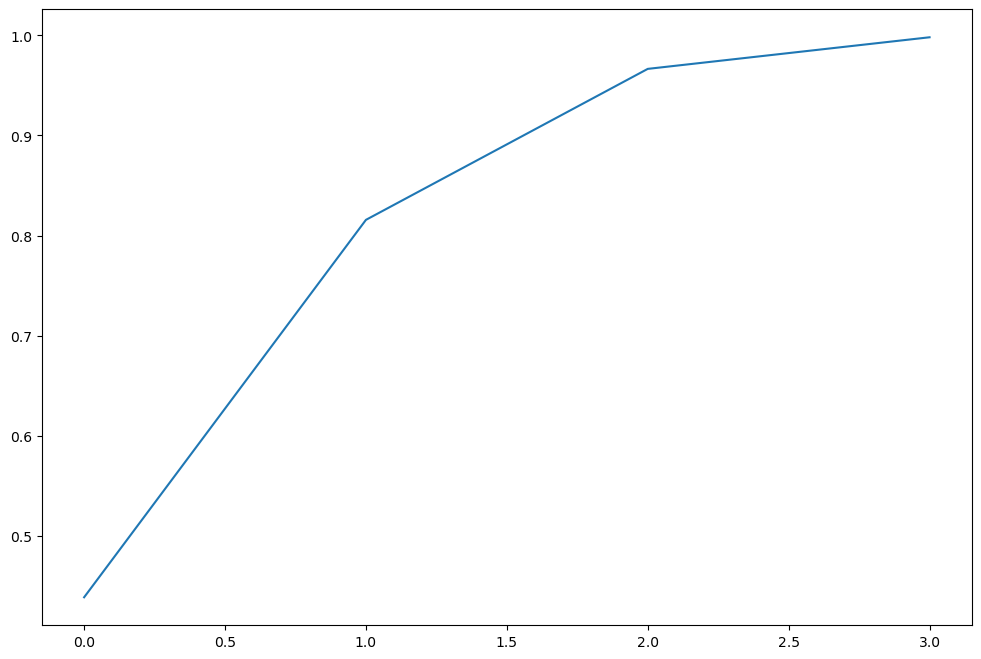

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(res)
plt.show()